---
# Sales Prediction for Advertising
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

**Problem Statement**:
- Build a model which predicts sales based on the money spent on different platforms for marketing.

**We're going to build a Linear Regression model to *predict sales* using an appropriate predictor variable.**

### Data Exploration

In [2]:
df = pd.read_csv("data/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


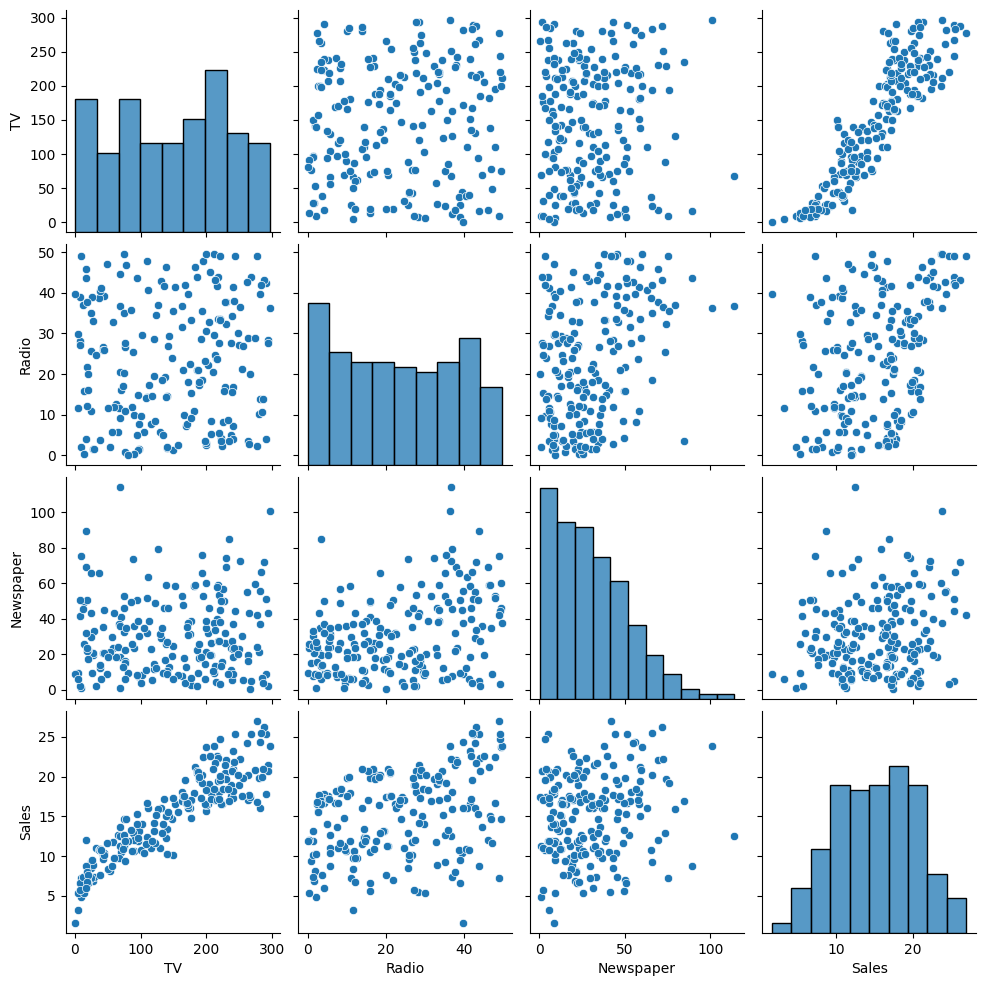

In [5]:
sns.pairplot(df);

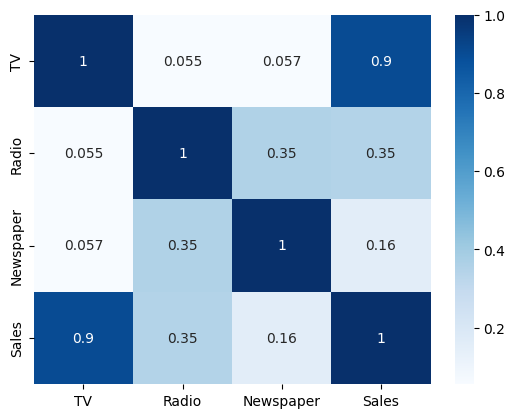

In [6]:
sns.heatmap(df.corr(), cmap='Blues',annot=True);

We can see clearly that the `TV` column is the most correlated with `Sales`.

In [7]:
df.corrwith(df['Sales'])

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
dtype: float64

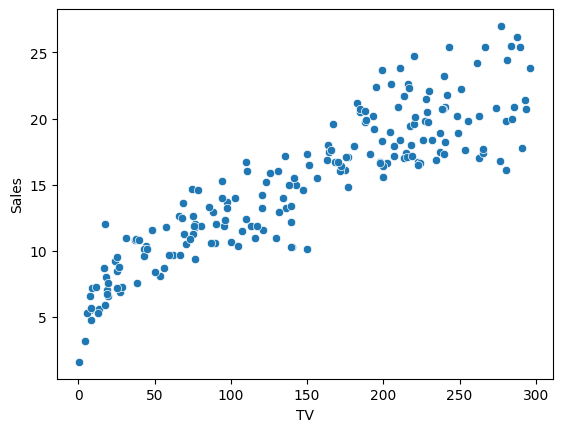

In [8]:
sns.scatterplot(data=df, x='TV', y='Sales');

**Preparing `train` and `test` data.**

In [9]:
x = np.asanyarray(df[['TV']])
y = np.asanyarray(df[['Sales']])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

print(f'{x_train.shape=}')
print(f'{x_test.shape=}')
print(f'{y_train.shape=}')
print(f'{y_test.shape=}')

x_train.shape=(180, 1)
x_test.shape=(20, 1)
y_train.shape=(180, 1)
y_test.shape=(20, 1)


### Modeling -> Simple Linear Regression

In [10]:
LR_model = linear_model.LinearRegression()
LR_model.fit(x_train, y_train)

LinearRegression()

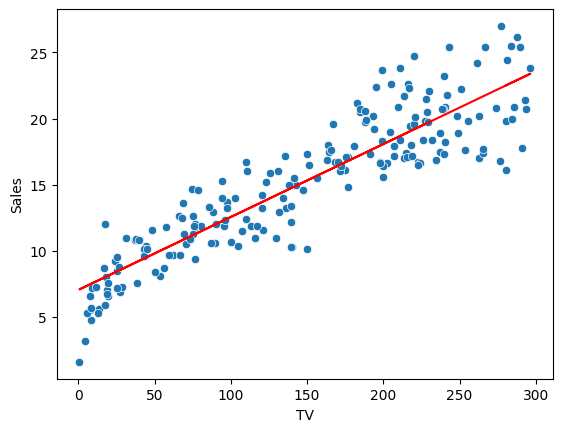

In [11]:
sns.scatterplot(data=df, x='TV', y='Sales')
plt.plot(x_train, LR_model.predict(x_train), 'red');

In [12]:
y_pred = LR_model.predict(x_test)

In [13]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'{MAE=}')
print(f'{RMSE=}')

MAE=2.037955356968121
RMSE=2.5103822386472214


In [14]:
LR_model.score(x_test, y_test)

0.8071768727953934